In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:
data = {
    "sore_throat": [1,0,1,1,0,0,0,1,0,1],
    "fever": [1,0,1,0,1,0,0,0,1,1],
    "swollen_glands": [1,0,0,1,0,0,1,0,0,0],
    "congestion": [1,1,1,0,1,1,0,1,1,1],
    "headache": [1,1,0,0,0,0,0,1,1,1],
    "diagnosis": ["strep_throat","allergy","cold","strep_throat","cold","allergy","strep_throat","allergy","cold","cold"]
}

df = pd.DataFrame(data)
print(df)

   sore_throat  fever  swollen_glands  congestion  headache     diagnosis
0            1      1               1           1         1  strep_throat
1            0      0               0           1         1       allergy
2            1      1               0           1         0          cold
3            1      0               1           0         0  strep_throat
4            0      1               0           1         0          cold
5            0      0               0           1         0       allergy
6            0      0               1           0         0  strep_throat
7            1      0               0           1         1       allergy
8            0      1               0           1         1          cold
9            1      1               0           1         1          cold


In [11]:
x = df.iloc[:,:5]
y = df.iloc[:,5]
# print(x)
# print(y)

In [12]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=2)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

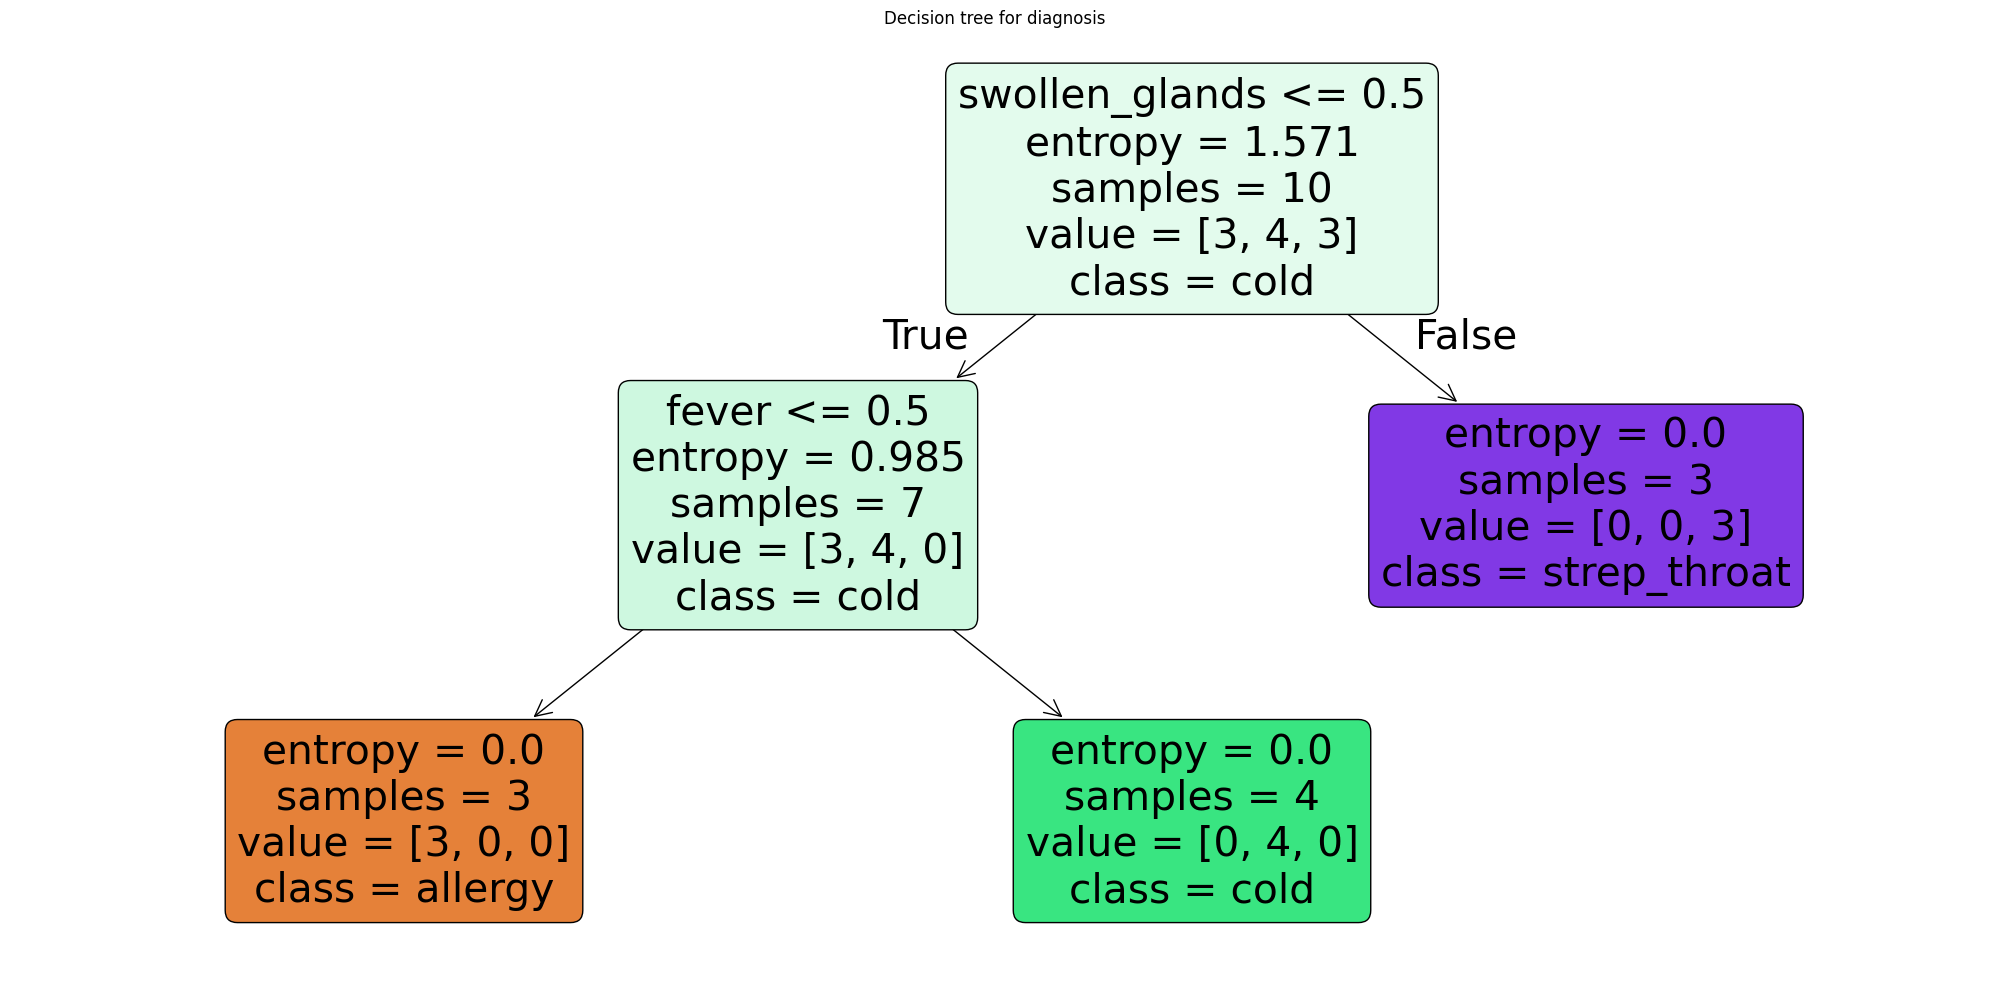

In [20]:
plt.figure(figsize=[20,10])
_=tree.plot_tree(model, feature_names=feature_names, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision tree for diagnosis")
plt.tight_layout()
plt.show()

In [22]:
sample = pd.DataFrame([[1,1,0,1,1]], columns=feature_names)
pred = model.predict(sample)
proba = model.predict_proba(sample)

print("Sample:", sample)
print("Predicted diagnosis:", pred[0])
print("Class probabilities:")
for cls, p in zip(model.classes_, proba[0]):
    print(f" - {cls}: {p:.3f}")

Sample:    sore_throat  fever  swollen_glands  congestion  headache
0            1      1               0           1         1
Predicted diagnosis: cold
Class probabilities:
 - allergy: 0.000
 - cold: 1.000
 - strep_throat: 0.000
